In [157]:
import os
import json
import pandas as pd
from pandas.io.json import json_normalize

paragraph_txt_list = []
essay_type_list = []
student_grade_list = []
paragraph_scoreT_avg_list = []

#"paragraph_txt", "essay_type", "student_grade"
path = './라벨링데이터'
category_list = os.listdir(path)
for category in category_list :
    if category == ".DS_Store" : continue
    category_path = path + "/" + category
    for file_dir in os.listdir(category_path) :
        with open(category_path + "/" +file_dir, 'r') as outfile:
            json_data = json.load(outfile)
            paragraph_scoreT_avg_list.append(json_data['score']['paragraph_score'][0]['paragraph_scoreT_avg'])
            paragraph_txt_list.append(json_data['paragraph'][0]['paragraph_txt'])
            essay_type_list.append(file_dir.split("_")[0])
            student_grade_list.append(file_dir.split("_")[1]+"_"+file_dir.split("_")[2])

In [158]:
print(len(paragraph_scoreT_avg_list))

6000


In [159]:
df = pd.DataFrame({"paragraph_txt" : paragraph_txt_list, "essay_type" : essay_type_list, "student_grade" : student_grade_list, "paragraph_scoreT_avg" : paragraph_scoreT_avg_list})


In [220]:
def replace_uni(text): 
    return text.replace("\u3000"," ").replace("\u200b","").replace("\ufeff","").replace("\u2009","").replace("‘","").replace("’","").replace("<span>", "").replace("</span>", "").replace("#@문장구분#", "").replace("&nbsp;", " ").replace("\u2019","").replace("&lt;","").replace("&gt;","").replace("amp;","").replace("#@","")

df['paragraph_txt'] = df['paragraph_txt'].apply(replace_uni)

In [221]:
df

,paragraph_txt,essay_level,org_paragraph,org,org_essay,org_coherence,org_quantity,con_novelty,con_clearance,con,...,exp_style,exp_grammar,exp,exp_vocab,punctuation_marks,ending_of_a_word,word_order,diff,Rouge_l_f1,paragraph_scoreT_avg
0,수많은 사람들이 sns를 하고 굵직굵직한 sns들이 세상에는 우리 생각보다 많이 있...,2,7,3,0,2,1,2,4,4,...,0,3,3,3,0,0,8,18,0.999291,2.833333
1,이산가족이 만날 수 있기 때문에 우리는 찬성을 해야 한다. 지금 우리는 가족과 함...,2,3,3,0,0,1,2,4,4,...,0,4,3,3,0,0,2,18,0.997769,2.190476
2,프랑수아 를로르의 꾸뻬씨의 행복여행... 이 책은 저명한 정신외과 의사인 꾸뻬가 ...,3,4,2,2,2,1,1,4,4,...,1,2,4,3,2,0,0,19,0.987600,2.388889
3,나의 생각은 사회적 차별이라고 생각한다. 성별은 남자와 여자로 나눠진다 . 과학...,2,6,3,0,3,1,3,3,4,...,4,2,3,4,0,0,0,20,0.994596,2.600000
4,"나는 고래가 되고 싶다. 내가 만약 고래가 된다면, 나는 우선 며칠 동안은 세계일...",3,5,2,1,1,1,2,4,4,...,0,3,4,3,0,0,2,8,0.992482,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,자신이 사는 지역에 쓰레기 매립지 님비(NIMBY) 현상 내 뒷마당에서는 안 된다(...,1,6,3,0,3,1,3,3,4,...,4,2,3,4,0,0,0,25,0.997973,2.800000
1196,남성과 여성이 생물학적 특징으로 잘 해낼 수 있고 강점이 있는 지갑과 일은 분명히 ...,2,6,3,0,3,1,3,3,4,...,4,2,3,4,0,0,0,14,0.996343,2.333333
1197,혐오시설을 설치하는 것은 당연하게도 반발을 얻을 수 밖에 없다. 혐오시설로 지정된...,1,6,3,0,3,1,3,3,4,...,4,2,3,4,0,0,4,23,0.996280,3.000000
1198,"정부에서 내년부터 2031년까지 공공 목적 위성 170여기를 개발하고, 국내 발사체...",2,3,2,3,2,1,1,4,4,...,2,2,4,3,0,0,2,9,0.995827,3.000000


<AxesSubplot:xlabel='paragraph_scoreT_avg', ylabel='count'>

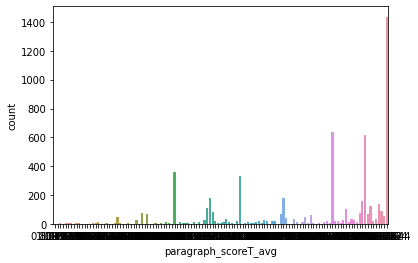

In [200]:
sns.countplot(x=df['paragraph_scoreT_avg'])

<AxesSubplot:xlabel='count', ylabel='paragraph_scoreT_avg'>

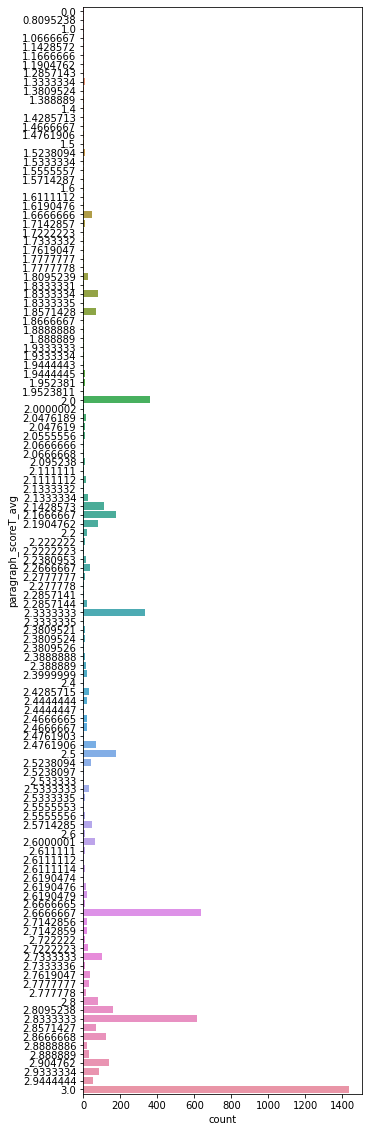

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(5,20))
sns.countplot(y=df['paragraph_scoreT_avg'])

In [181]:
df.paragraph_scoreT_avg.value_counts() #.keys()

3.000000    1436
2.666667     636
2.833333     613
2.000000     358
2.333333     331
            ... 
2.523810       1
1.833333       1
1.722222       1
1.555556       1
2.066667       1
Name: paragraph_scoreT_avg, Length: 123, dtype: int64

In [210]:
def give_grade(n) :
    if n == 3.0 :
        return 'A'
    elif n >= 2.75 :
        return 'B'
    elif n >= 2.333335 :
        return 'C'
    else :
        return 'D'

In [211]:
df["grade"] = df["paragraph_scoreT_avg"].apply(give_grade)

In [212]:
df.grade.value_counts()

D    1614
C    1491
B    1459
A    1436
Name: grade, dtype: int64

In [214]:
df

,paragraph_txt,essay_type,student_grade,paragraph_scoreT_avg,grade
0,나는 다수결을 반대한대 왜냐하면 이거를 싫어하는사람도분명히 있을텐데 다 수결로만해서...,찬성반대,초등_5학년,2.142857,D
1,교육을 받기를 원하는 사람이 있으면 딱히 받고 싶지 않은 사람이 있을 지도 모른다....,찬성반대,중등_1학년,3.000000,A
2,남한과 북한의 통일은 너무너무 복잡한 일이라고 생각합니다. 우리는 북한과 오랜시간 ...,찬성반대,초등_4학년,3.000000,A
3,요즘 환경문제에 대한 뉴스를 쉽게 접할 수 있습니다. 최근에는 미국 캘리포니에에서 ...,찬성반대,초등_6학년,3.000000,A
4,나는남북 통일에찬성 합니다. 왜냐하면 전쟁을하다가 죽은사람이 얼마나 만은데 그래서저...,찬성반대,초등_4학년,1.619048,D
...,...,...,...,...,...
5995,내가 최근에 봤던 영화는 블랙 위도우라는 마블 영화이다. 나는 원래 마블의 영화를 ...,설명글,고등_1학년,2.111111,D
5996,제가 다녔던 유치원은 초등학교 부설 유치원이어서 초등학교에 입학하지 않았어도 방과후...,설명글,고등_3학년,3.000000,A
5997,나는 옛날부터 it관련된 직업에 관심이 많이 있었었다. 그래서 it관련 회사인 마이...,설명글,고등_1학년,2.500000,C
5998,저의 꿈은 초등학교 선생님입니다. 스승이라는 단어를 생각하면 대다수가 제일 먼저 떠...,설명글,중등_1학년,2.666667,C


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df= train_test_split(df, test_size= 1/6, random_state= 42)
train_df.to_csv("./train.csv", index = False)
test_df.to_csv("./test.csv", index = False)